In [61]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns

import pandas as pd
import numpy as np

import sys
sys.path.append('..')

from util.helpers import id2label, labels


In [62]:
df = pd.read_csv('../../dataset/cleaned_arguments_in_context_learning.csv')
df

,text,actor,label
0,Abelia har 2900 medlemmer over hele landet. Ku...,Abelia,0
1,Utredningen gir et betydningsfullt perspektiv ...,Abelia,0
2,Klimapolitikken må favne bredere. Innovasjon e...,Abelia,0
3,"Norway had a good starting point in 2010, but ...",Abelia,0
4,Særlig fokus på følgende punkter i oppfølginge...,Abelia,0
...,...,...,...
3293,Å hente på bedre og mer samordnet areal- og tr...,ZERO,5
3294,Digitale løsninger Samordning av logistikk og ...,ZERO,5
3295,klimamålene kan bare innfris gjennom et aksele...,ZERO,5
3296,Alle prosjekter som skal inn i NTP må kunne re...,ZERO,5


In [63]:
df["label"].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [64]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [65]:
vector = TfidfVectorizer()

X = vector.fit_transform(df["text"])
y = df["label"].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
mnb = MultinomialNB()

model = mnb.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = np.array(y_pred)
y_pred = y_pred.reshape(-1, 1)
print(accuracy_score(y_test, y_pred))
y_test = [id2label(y) for y in y_test]
# Flatten list
y_pred = y_pred.flatten()

y_pred = [id2label(y) for y in y_pred]

labels = labels()



print(classification_report(y_test, y_pred, target_names=labels))


0.44545454545454544
                        precision    recall  f1-score   support

       Interessegruppe       0.00      0.00      0.00         4
 Offentlig forvaltning       0.00      0.00      0.00        76
               Bedrift       0.00      0.00      0.00        66
          Privatperson       0.39      1.00      0.57       217
        Politisk parti       0.88      0.16      0.27       132
Frivillig organisasjon       1.00      0.10      0.19        49
 Akademisk institusjon       0.62      0.45      0.52       116

              accuracy                           0.45       660
             macro avg       0.41      0.24      0.22       660
          weighted avg       0.49      0.45      0.34       660



c:\Users\henriklarsen\anaconda3\envs\TDT4310\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\henriklarsen\anaconda3\envs\TDT4310\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\henriklarsen\anaconda3\envs\TDT4310\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

<Axes: >

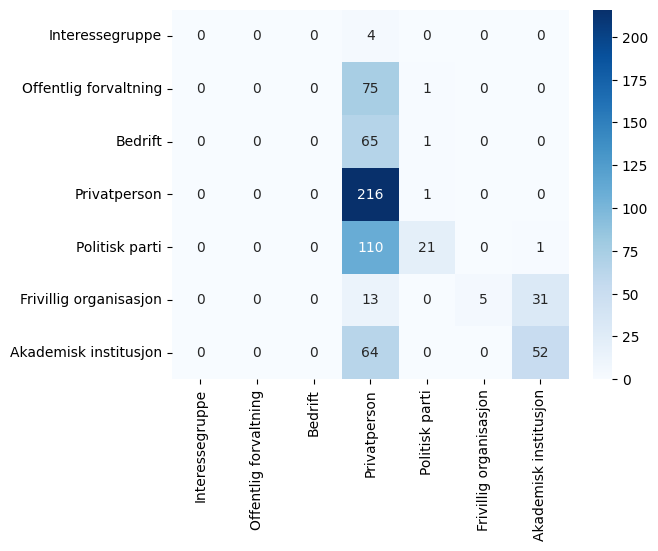

In [67]:

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True, fmt='', cmap='Blues', xticklabels=labels, yticklabels=labels)

### Countvectorizer

0.5696969696969697
                        precision    recall  f1-score   support

       Interessegruppe       0.00      0.00      0.00         4
 Offentlig forvaltning       0.40      0.25      0.31        76
               Bedrift       0.88      0.11      0.19        66
          Privatperson       0.53      0.81      0.64       217
        Politisk parti       0.61      0.58      0.60       132
Frivillig organisasjon       0.80      0.33      0.46        49
 Akademisk institusjon       0.63      0.71      0.66       116

              accuracy                           0.57       660
             macro avg       0.55      0.40      0.41       660
          weighted avg       0.60      0.57      0.54       660



c:\Users\henriklarsen\anaconda3\envs\TDT4310\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\henriklarsen\anaconda3\envs\TDT4310\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\henriklarsen\anaconda3\envs\TDT4310\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

<Axes: >

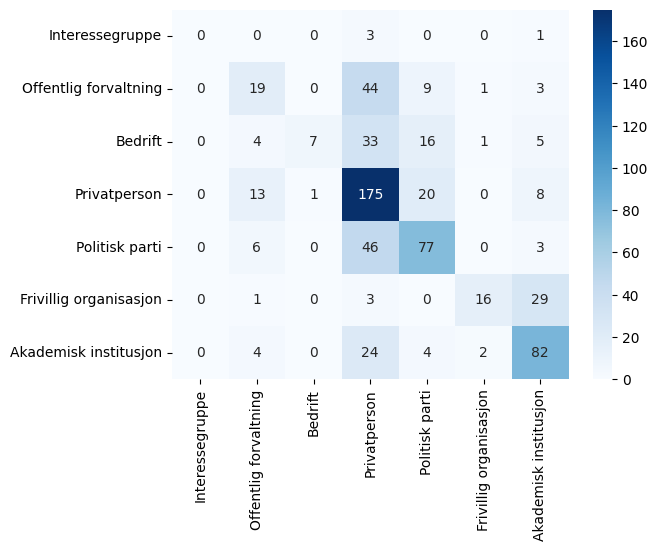

In [68]:
vector = CountVectorizer()

X = vector.fit_transform(df["text"])
y = df["label"].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


mnb = MultinomialNB()

model = mnb.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = np.array(y_pred)
y_pred = y_pred.reshape(-1, 1)
print(accuracy_score(y_test, y_pred))

# Convert ids to labels
y_test = [id2label(y) for y in y_test]
# Flatten list
y_pred = y_pred.flatten()

y_pred = [id2label(y) for y in y_pred]

print(classification_report(y_test, y_pred, target_names=labels))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True, fmt='', cmap='Blues', xticklabels=labels, yticklabels=labels)

## Binary classifier MNB

## MNB binary classifier with count vectorizer

In [69]:
vector = CountVectorizer()

X = vector.fit_transform(df["text"])
y = df["label"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train)

[2 0 0 ... 0 5 0]


In [70]:
# Try with a binary classifier
vector = TfidfVectorizer()

X = vector.fit_transform(df["text"])
y = df["label"].to_numpy()

# Remove set all labels that are not 3 (Interessegruppe) to 0
y = np.where(y == 5, 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [71]:
mnb = MultinomialNB()

model = mnb.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

print(accuracy(y_test, y_pred))

0.9022727272727272


<Axes: >

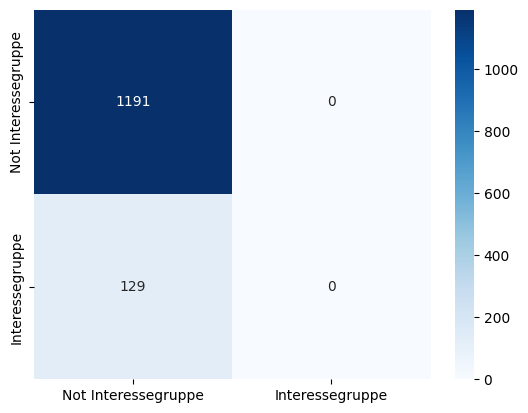

In [72]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Interessegruppe', 'Interessegruppe'], yticklabels=['Not Interessegruppe', 'Interessegruppe'])


### Binary classifer with CountVectorizer


In [73]:
# Try with a binary classifier
vector = CountVectorizer()

X = vector.fit_transform(df["text"])
y = df["label"].to_numpy()


# Remove set all labels that are not 3 (Interessegruppe) to 0
y = np.where(y == 3, 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [74]:
mnb = MultinomialNB()

model = mnb.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1, 1)

print(accuracy(y_test, y_pred))

0.7319077134986226


<Axes: >

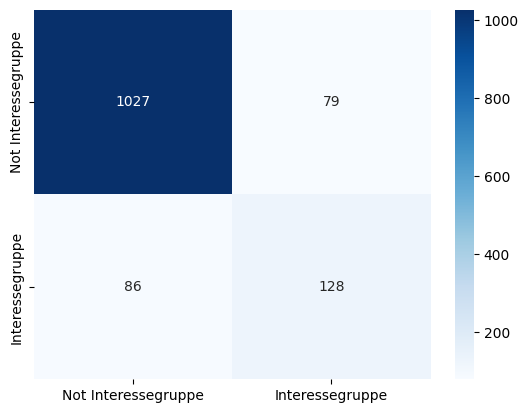

In [75]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Interessegruppe', 'Interessegruppe'], yticklabels=['Not Interessegruppe', 'Interessegruppe'])